In [409]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize


def func_sort(x,y,Ndim):
    ind=np.argsort(x[:,0])
    for i in range(Ndim):
        temp=x[:,i]
        temp=temp[ind]
        x[:,i]=temp
    y=y[ind]
    return (x,y)


def func_synth1(x,noise):
    x1=x[:,0]
    x2=x[:,1]
    #two variable
    y=np.minimum(x1,0.4)+0.1*np.maximum(x2,0.6)+0.12*np.heaviside(x1-0.7,0)+0.1*np.sqrt(0.2*(x1-x2)*(x1-x2))
    #
    #one variable
    y=-np.minimum(x1,0.1)-np.maximum(x1,0.8)+0.1*np.maximum(x1,0.6)
    y+=0.12*np.heaviside(x1-0.7,0)+0.01*np.sqrt(0.2*(x1-0.5)*(x1-0.5))
    ymin=-0.8713407682196679
    ymax=-0.6990032142977523
    y=(y-ymin)/(ymax-ymin)
    y=y+noise  #add noise
    return y




def func_mse(y,yhat):
    return 0.5*np.mean((y-yhat)*(y-yhat))

def func_optimize0(b,x,y):
    yhat=func_test0(x,b)
    return func_mse(y,yhat)

def func_optimize1(b,b_inactive,x,y):
    yhat=func_test1(x,b,b_inactive)
    return func_mse(y,yhat)



def func_error_index(y,yhat):
    mse=np.mean((y-yhat)*(y-yhat))
    std_y=np.std(y)
    R2=1-mse/(std_y**2)
    return R2
    
    
Nx=100
Ndim=2

x=np.random.rand(Nx,Ndim)

y=np.random.rand(Nx)

(x,y)=func_sort(x,y,Ndim)
x1=x[:,0]
x2=x[:,1]

noise=0.03*np.random.normal(0,1,Nx)
noise+=0.03*np.random.lognormal(0,1,Nx)

y=func_synth1(x,noise)

func_optimize_anonym0 = lambda b : func_optimize0(b,x,y)
func_optimize_anonym1 = lambda b : func_optimize1(b,b1_inactive,x,y)

In [410]:
#plotting functions


def func_plot_scatter2(y,yhat0,yhat1,name0_='func1',name1_='func2'):
    R2_f0=np.round(func_error_index(y,yhat0),3)
    R2_f1=np.round(func_error_index(y,yhat1),3)    
    str0=name0_+', R2='+str(R2_f0)
    str1=name1_+', R2='+str(R2_f1)
    #plt.figure(figsize=(8, 8), dpi=80)
    fig, axs = plt.subplots(1,2,figsize=(12, 6))
    fig.suptitle('scatter plots of y vs yhat')
    axs[0].scatter(y,yhat0,s=10)
    axs[0].plot([0,1],[0,1],'b')
    axs[0].plot([1,0,1],[0.8,0,1.2],'b--')
    axs[0].set_title(name0_)
    axs[0].set_xlabel('y observe')
    axs[0].set_xlabel('yhat')
    axs[0].set_title(str0)
    axs[1].scatter(y,yhat1,s=10)
    axs[1].plot([0,1],[0,1],'b')
    axs[1].plot([1,0,1],[0.8,0,1.2],'b--')    
    axs[1].set_title(name1_)
    axs[1].set_xlabel('y observe')
    axs[1].set_xlabel('yhat')
    axs[1].set_title(str1)
    plt.show()

def func_plot_scatter(y,yhat):
    R2=np.round(func_error_index(y,yhat),3)
    plt.figure()
    plt.title('y vs yhat scatter, R2='+str(R2))
    plt.scatter(y,yhat,s=10)
    plt.xlabel('y')
    plt.xlabel('yhat')
    plt.show()
    

    
def func_plot_xy(x1,y,yhat0,yhat1,name0_='func1',name1_='func2'):
    R2_f0=np.round(func_error_index(y,yhat0),3)
    R2_f1=np.round(func_error_index(y,yhat1),3)    
    str0=name0_+', R2='+str(R2_f0)
    str1=name1_+', R2='+str(R2_f1)
    plt.figure()
    plt.title('y&yhat vs x1')
    plt.scatter(x1,y, label='observation',s=10)
    plt.plot(x1,yhat0, label=str0)
    plt.plot(x1,yhat1, label=str1)
    plt.xlabel('x1')
    plt.xlabel('y')
    plt.legend()
    plt.show()


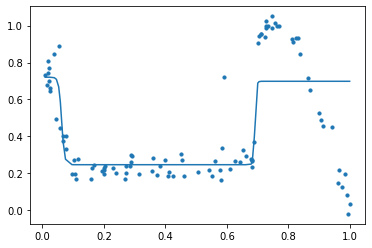

In [411]:
#define functions 0

def func_test0(x,b):
    x1=x[:,0]
    #y=b[0]+b[1]*x1+b[2]*x1*x1+b[3]*np.sqrt(x1)+b[4]*np.heaviside(x1-0.5,0)
    #y=b[0]+b[1]*np.sin(b[2]*x1)+b[3]*np.sin(b[4]*x1)+b[5]*np.sin(b[6]*x1)
    #y=b[0]+b[1]*np.sin(b[2]+b[3]*x1)+b[4]*np.sin(b[5]+b[6]*x1)+b[7]*np.sin(b[8]+b[9]*x1)
    y=b[0]+b[1]*np.tanh(b[2]+b[3]*x1)
    y+=b[4]*np.tanh(b[5]+b[6]*x1)
    y+=b[7]*np.tanh(b[8]+b[9]*x1)
    y+=b[10]*np.tanh(b[11]+b[12]*x1)
    y+=b[13]*np.tanh(b[14]+b[15]*x1)
    return y
    
Nv0=15+1
b0=np.random.random(Nv0)
optimize0=scipy.optimize.minimize(func_optimize_anonym0,b0)
b0=optimize0.x
yhat0=func_test0(x,b0)

plt.scatter(x1,y,s=10)
plt.plot(x1,yhat0)

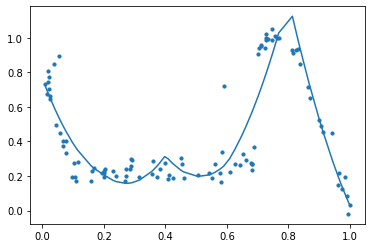

In [412]:

def func_test1(x,b,b_inactive=None):
    if b_inactive!=None:
        b[b_inactive]=0  #remove parameters from optimization
    
    x1=x[:,0]
    x2=x[:,1]
    
    y=b[0]+b[1]*x1+b[2]*x2
    y+=b[3]*abs(x1-0.2)+b[4]*abs(x1-0.3)+b[5]*abs(x1-0.5)+b[6]*abs(x1-0.7)
    y+=b[8]*np.heaviside(x1-0.7,0)
    y+=b[9]*x1*x1+b[10]*np.sqrt(x1)
    y+=b[11]*np.heaviside(x1-0.5,0)
    y+=b[12]*np.heaviside(x1-0.2,0)
    
    y=b[0]+b[1]*np.abs(x1-0)+b[2]*np.abs(x1-0.2)
    y+=b[3]*np.abs(x1-0.4)+b[4]*np.abs(x1-0.6)+b[5]*np.abs(x1-0.8)+b[6]*np.abs(x1-1)
    y+=b[7]*(x1-0.3)*(x1-0.6)
    
    return y

Nv1=15
b1=np.random.rand(Nv1)
oo1=np.ones(Nv1)
b1minmax=np.c_[-10*oo1,+10*oo1]
b1_inactive=[]
optimize1=scipy.optimize.minimize(func_optimize_anonym1,b1,bounds=b1minmax)
b1=optimize1.x
yhat1=func_test1(x,b1,b1_inactive)


plt.scatter(x1,y,s=10)
plt.plot(x1,yhat1)

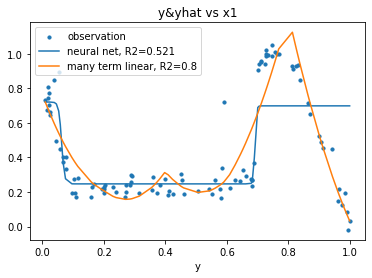

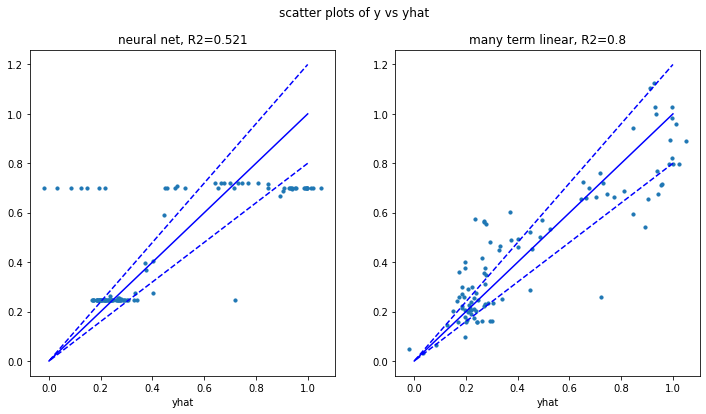

In [413]:

#plot everything



func_plot_xy(x1,y,yhat0,yhat1,'neural net','many term linear') #show plot2
func_plot_scatter2(y,yhat0,yhat1,'neural net','many term linear')



In [414]:
def func_band(x,b):
    x1=x[:,0]
    std=b[0]+b[1]*x1+b[2]*x1*x1
    std=b[0]
    return std

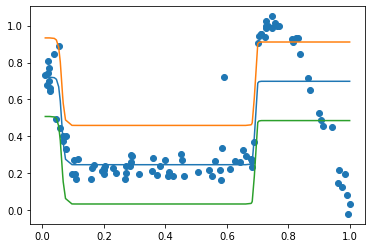

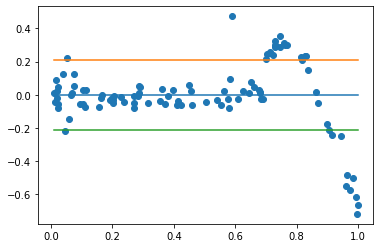

In [415]:
b_main=b0
yhat=func_test0(x,b_main)
b_std=np.std(yhat-y)

res0=np.ones(Nx)*b_std

plt.scatter(x1,y)
plt.plot(x1,yhat)
plt.plot(x1,yhat+b_std)
plt.plot(x1,yhat-b_std)

plt.figure()
plt.scatter(x1,y-yhat)
plt.plot(x1,0*res0)
plt.plot(x1,res0)
plt.plot(x1,-res0)

0.046001189531413925 0.04359597888567247 0.04467940665170728


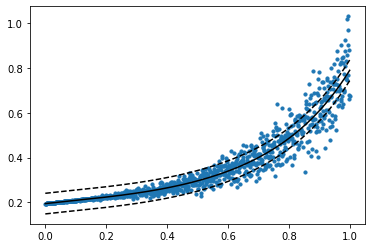

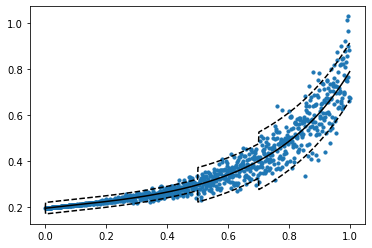

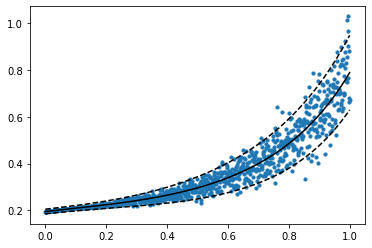

In [416]:
%reset -f
import matplotlib.pyplot as plt
import numpy as np


Nx=1000
x=np.arange(Nx)/Nx
y=np.zeros(Nx)


y=0.4*np.power(x+0.3,0.6+x+x*x)
ynoise=y+0.1*np.random.normal(0,1,Nx)*x*x


b=[0,1]



std0=np.std(ynoise-y)
res0=std0*np.ones(Nx)
res1=0.125*(0.2*(x>0)+0.4*(x>0.5)+0.4*(x>0.7))
res2=0.01+0.15*x*x
std1=np.std(res1)
std2=np.std(res2)


plt.figure()
plt.plot(x,y,'k')
plt.plot(x,y+std0,'k--')
plt.plot(x,y-std0,'k--')
plt.scatter(x,ynoise,s=10)


plt.figure()
plt.plot(x,y,'k')
plt.plot(x,y+res1,'k--')
plt.plot(x,y-res1,'k--')
plt.scatter(x,ynoise,s=10)

plt.figure()
plt.plot(x,y,'k')
plt.plot(x,y+res2,'k--')
plt.plot(x,y-res2,'k--')
plt.scatter(x,ynoise,s=10)

print(std0,std1,std2)





Text(0.5, 1.0, 'std=0.1*x^2')

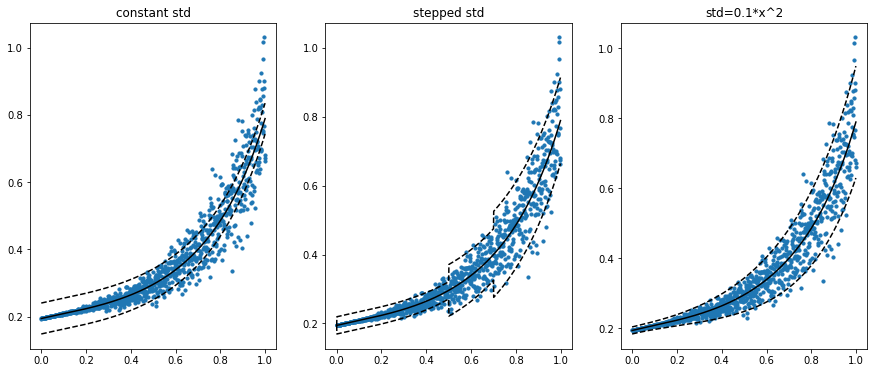

In [417]:
fig, axs = plt.subplots(1,3,figsize=(15, 6))


axs[0].plot(x,y,'k')
axs[0].plot(x,y+std0,'k--')
axs[0].plot(x,y-std0,'k--')
axs[0].scatter(x,ynoise,s=10)
axs[0].set_title('constant std')

axs[1].plot(x,y,'k')
axs[1].plot(x,y+res1,'k--')
axs[1].plot(x,y-res1,'k--')
axs[1].scatter(x,ynoise,s=10)
axs[1].set_title('stepped std')

axs[2].plot(x,y,'k')
axs[2].plot(x,y+res2,'k--')
axs[2].plot(x,y-res2,'k--')
axs[2].scatter(x,ynoise,s=10)
axs[2].set_title('std=0.1*x^2')

Text(0.5, 1.0, 'std=0.1*x^2')

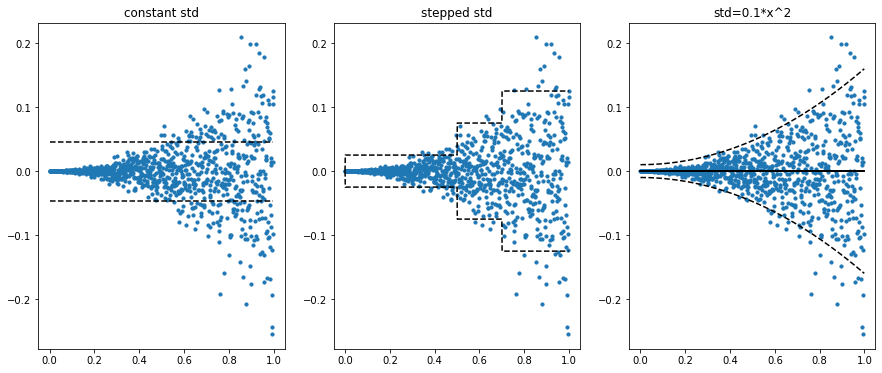

In [418]:
fig, axs = plt.subplots(1,3,figsize=(15, 6))

axs[2].plot(x,res0*0,'k')
axs[0].plot(x,res0,'k--')
axs[0].plot(x,-res0,'k--')
axs[0].scatter(x,y-ynoise,s=10)
axs[0].set_title('constant std')


axs[2].plot(x,res0*0,'k')
axs[1].plot(x,res1,'k--')
axs[1].plot(x,-res1,'k--')
axs[1].scatter(x,y-ynoise,s=10)
axs[1].set_title('stepped std')

axs[2].plot(x,res0*0,'k')
axs[2].plot(x,res2,'k--')
axs[2].plot(x,-res2,'k--')
axs[2].scatter(x,y-ynoise,s=10)
axs[2].set_title('std=0.1*x^2')

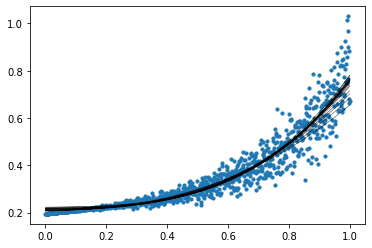

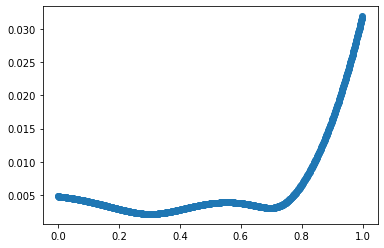

In [510]:
#it should have the same std as constant std
import scipy.optimize

N_regr=20
N_v=3

b_vec=np.random.rand(N_regr,N_v)*0.1

def func_test0(b,x):
    return b[0]+(b[1]+1)*np.power(x+0.15,b[2]+0.5)

def func_mse(y,yhat):
    return np.mean((y-yhat)*(y-yhat))

def func_optimize(b,x,y):
    yhat=func_test0(b,x)
    return func_mse(y,yhat)



func_optimize_anonym0 = lambda b : func_optimize(b,x_sample,y_sample)

for i in range(N_regr):
    b_temp=b_vec[i,:]
    ind=np.random.choice(np.arange(len(x)), 15, replace=False)
    x_sample=x[ind]
    y_sample=y[ind]


    optimize1=scipy.optimize.minimize(func_optimize_anonym0,b_temp)
    b_temp=optimize1.x
    b_vec[i,:]=b_temp

    yhat=func_test0(b_temp,x)
    

    
yhat_matrix=np.zeros((N_regr,Nx))
    
plt.scatter(x,ynoise,s=10)
for i in range(N_regr):
    yhat=func_test0(b_vec[i,:],x)
    yhat_matrix[i,:]=yhat
    plt.plot(x,yhat, 'k', linewidth=0.4)

std_vec=np.std(yhat_matrix,axis=0)
plt.figure()
plt.scatter(x,std_vec)

In [499]:
print(np.mean(b_vec[:,0]),np.power(np.std(b_vec[:,0]),2))
print(np.mean(b_vec[:,1]),np.power(np.std(b_vec[:,1]),2))
print(np.mean(b_vec[:,2]),np.power(np.std(b_vec[:,2]),2))

0.2115107033511165 3.361918385085927e-05
-0.6646148184671202 8.351905407272489e-05
2.8911665752807547 0.05431421665259597


In [500]:
aa=np.cov(b_vec,rowvar=False)

import pandas as pd

pd.DataFrame(aa)


,0,1,2
0,0.000035,-0.000011,0.001049
1,-0.000011,0.000088,0.000873
2,0.001049,0.000873,0.057173
